In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Carga de datos
datos = pd.read_csv('housing data.csv')

# Nombres de las columnas
nombres_columnas = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Asignación de nuevos nombres de columnas
datos.columns = nombres_columnas

#ver el archivo 
print (datos[:20])


       CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0   0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242.0   
1   0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242.0   
2   0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222.0   
3   0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222.0   
4   0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222.0   
5   0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311.0   
6   0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311.0   
7   0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311.0   
8   0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311.0   
9   0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311.0   
10  0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311.0   
11  0.09378  12.5   7.87     0  0.524  5.889   39.0  5.4509    5  311.0   
12  0.62976   0.0   8.14 

In [9]:
# Exercici 1: Dividir los datos en entrenamiento y prueba
#Esta técnica es conocida como "dividir en entrenamiento y prueba", y es un paso crucial en el proceso de creación de modelos de aprendizaje automático.
#El objetivo principal de dividir los datos en entrenamiento y prueba es evaluar el rendimiento de un modelo de aprendizaje automático. Se utiliza una parte de los datos para entrenar el modelo y otra parte para evaluar su rendimiento en datos que el modelo no ha visto antes. De esta manera, se puede verificar si el modelo generaliza bien a nuevos datos y si es capaz de hacer predicciones precisas.
#El argumento test_size en el método train_test_split se utiliza para especificar la proporción de datos que se deben asignar a la parte de prueba. En este caso, se establece en 0.2, lo que significa que el 20% de los datos se asignará a la parte de prueba y el 80% restante se asignará a la parte de entrenamiento.
#En resumen, la división en entrenamiento y prueba es una técnica importante para evaluar el rendimiento de un modelo de aprendizaje automático y asegurarse de que el modelo funcione correctamente en datos desconocidos.


train_data, test_data = train_test_split(datos, test_size=0.2)

In [8]:
# Estadísticas básicas para el conjunto de entrenamiento
print(train_data.describe())

# Estadísticas básicas para el conjunto de prueba
print(test_data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean     3.521924   12.180693   11.040941    0.061881    0.552121    6.271082   
std      8.607193   24.373276    6.903179    0.241238    0.117384    0.703985   
min      0.009060    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.078935    0.000000    5.130000    0.000000    0.447750    5.878750   
50%      0.229015    0.000000    8.560000    0.000000    0.532000    6.168000   
75%      3.594927   20.000000   18.100000    0.000000    0.624000    6.626000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.704000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean    67.873267    3.882685    9.480198  406.591584   18.424257  355.712005   
std     28.629480    2.1522

In [13]:
#exercici 2: Aplica algun procés de transformació (a. estandarditzar les dades numèriques, b. crear columnes dummies, c. polinomis...).
#a. estandarditzar les dades numèriques:

# Seleccionar las columnas numéricas
columnas_numericas = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
datos_numericos = train_data[columnas_numericas]

# Instanciar StandardScaler
scaler = StandardScaler()

# Ajustar y transformar los datos
datos_estandarizados = scaler.fit_transform(datos_numericos)

# Reemplazar los datos originales por los estandarizados
train_data[columnas_numericas] = datos_estandarizados

[[ 0.05460464 -0.48616748  1.02257822 ...  0.36662143  0.30652906
  -0.53220876]
 [-0.28141292 -0.48616748  1.57660155 ...  0.42712599  0.83878915
  -0.91735282]
 [ 0.10291733 -0.48616748  1.23892506 ...  0.42712599  2.00428009
  -0.77009185]
 ...
 [-0.3787589  -0.48616748 -1.03125496 ...  0.36142268 -1.03782435
   0.79313993]
 [-0.04992569 -0.48616748  1.02257822 ...  0.38310256 -0.30362276
  -0.06777033]
 [ 3.03764863 -0.48616748  1.02257822 ... -1.62947605  1.08977359
  -0.69079749]]


In [18]:
#b. crear columnes dummies
# Seleccionar la columna categórica
columna_categórica = ['CHAS']

# Crear columnas dummies
dummies = pd.get_dummies(train_data[columna_categórica], prefix='CHAS')

# Concatenar las columnas dummies al DataFrame original
train_data = pd.concat([train_data, dummies], axis=1)

# Eliminar la columna categórica original
train_data = train_data.drop(columna_categórica, axis=1)

KeyError: "None of [Index(['CHAS'], dtype='object')] are in the [columns]"

In [25]:
# Resumen estadístico de las columnas dummies
print(dummies.describe())

             CHAS
count  404.000000
mean     0.064356
std      0.245691
min      0.000000
25%      0.000000
50%      0.000000
75%      0.000000
max      1.000000


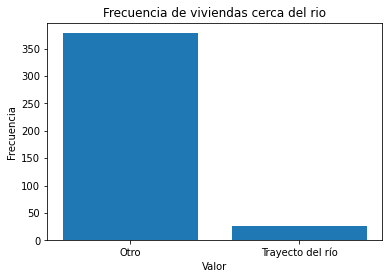

In [60]:
# Crea un diccionario con las etiquetas para cada valor
etiquetas = {(0,): "Otro", (1,): "Trayecto del río"}

# Crea una lista de patrones para cada valor en la columna dummies
patrones = [etiquetas[val] for val in frecuencias.index.values]

# Crea el gráfico de barras con los patrones y etiquetas
plt.bar(patrones, frecuencias.values)

# Añade títulos y etiquetas de eje
plt.title("Frecuencia de viviendas cerca del rio")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")

# Muestra el gráfico
plt.show()

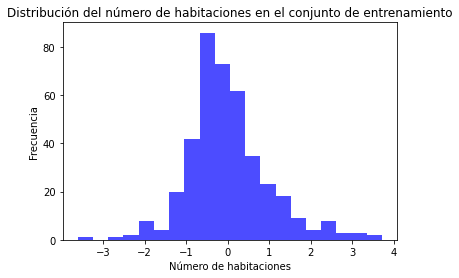

In [27]:
# Histograma de la columna 'RM' (número de habitaciones)
plt.hist(train_data['RM'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Número de habitaciones')
plt.ylabel('Frecuencia')
plt.title('Distribución del número de habitaciones en el conjunto de entrenamiento')
plt.show()

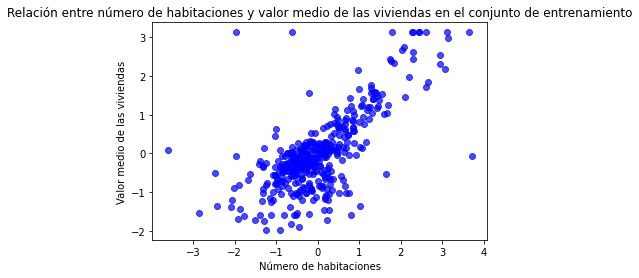

In [28]:
# Diagrama de dispersión de la columna 'RM' (número de habitaciones) contra 'MEDV' (valor medio de las viviendas)
plt.scatter(train_data['RM'], train_data['MEDV'], color='blue', alpha=0.7)
plt.xlabel('Número de habitaciones')
plt.ylabel('Valor medio de las viviendas')
plt.title('Relación entre número de habitaciones y valor medio de las viviendas en el conjunto de entrenamiento')
plt.show()

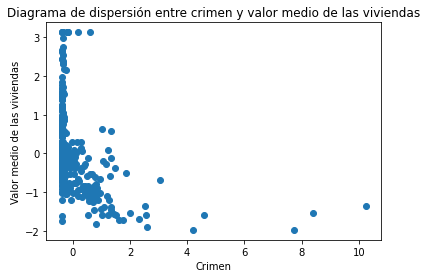

In [29]:
# Extraer los datos de las columnas "CRIM" y "MEDV"
x = train_data['CRIM']
y = train_data['MEDV']

# Crear el diagrama de dispersión
plt.scatter(x, y)

# Agregar título y etiquetas de ejes
plt.title("Diagrama de dispersión entre crimen y valor medio de las viviendas")
plt.xlabel("Crimen")
plt.ylabel("Valor medio de las viviendas")

# Mostrar el diagrama
plt.show()

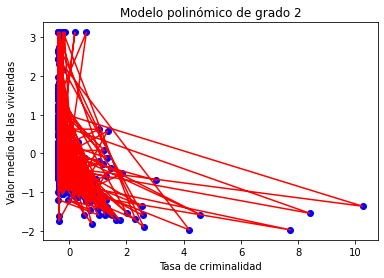

In [69]:
# Seleccionar las columnas deseadas
X = train_data[['CRIM', 'MEDV']].values

# Añadir una interacción de grado 2 a X
poly_features = PolynomialFeatures(degree=2, interaction_only=True)
X_poly = poly_features.fit_transform(X)

# Inicializar el modelo
model = LinearRegression()

# Entrenar el modelo
model.fit(X_poly, datos['MEDV'])

# Hacer predicciones
y_pred = model.predict(X_poly)

# Graficar los resultados
plt.scatter(train_data['CRIM'], train_data['MEDV'], color='blue')
plt.plot(train_data['CRIM'], y_pred, color='red')
plt.xlabel("Tasa de criminalidad")
plt.ylabel("Valor medio de las viviendas")
plt.title("Modelo polinómico de grado 2")
plt.show()

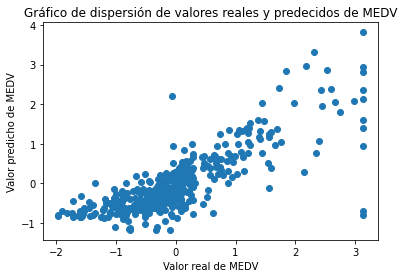

In [72]:
# Datos
X = train_data[['NOX', 'RM']]
y = train_data['MEDV']

# Generar polinomios
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Inicializar el modelo
model = LinearRegression()

# Entrenar el modelo
model.fit(X_poly, y)

# Hacer predicciones
y_pred = model.predict(X_poly)

# Graficar resultados
plt.scatter(y, y_pred)
plt.xlabel('Valor real de MEDV')
plt.ylabel('Valor predicho de MEDV')
plt.title('Gráfico de dispersión de valores reales y predecidos de MEDV')
plt.show()


/Users/usuario/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


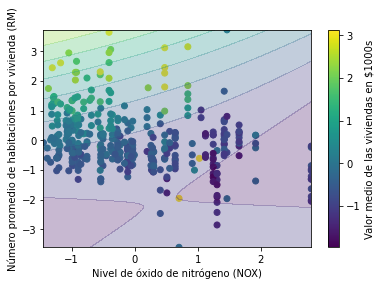

In [73]:
# Seleccionar las columnas NOX y RM
X = train_data[['NOX', 'RM']]

# Crear las características polinómicas
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# Inicializar el modelo
model = LinearRegression()

# Entrenar el modelo
model.fit(X_poly, train_data['MEDV'])

# Crear una malla de valores para la visualización
x_0, x_1 = np.meshgrid(
    np.linspace(train_data['NOX'].min(), train_data['NOX'].max(), 100),
    np.linspace(train_data['RM'].min(), train_data['RM'].max(), 100)
)
X_new = np.c_[x_0.ravel(), x_1.ravel()]
X_new_poly = poly_features.transform(X_new)
y_new = model.predict(X_new_poly)

# Graficar el modelo
plt.scatter(train_data['NOX'], train_data['RM'], c=train_data['MEDV'], cmap='viridis')
plt.xlabel('Nivel de óxido de nitrógeno (NOX)')
plt.ylabel('Número promedio de habitaciones por vivienda (RM)')
plt.colorbar().set_label('Valor medio de las viviendas en $1000s')
plt.contourf(x_0, x_1, y_new.reshape(x_0.shape), cmap='viridis', alpha=0.3)
plt.show()